In [3]:
#Importing Library
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [1]:
import seaborn as sns

In [4]:
df_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

df_USA = df_USA.dropna(subset=['salary_year_avg'])

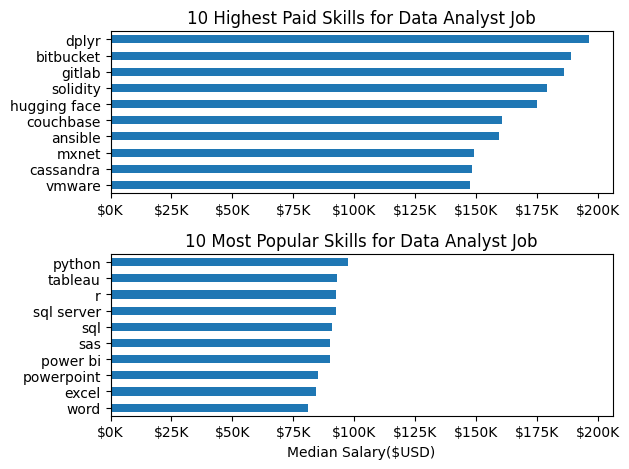

In [9]:
df_USA = df_USA.explode('job_skills')

df_USA[['job_skills', 'salary_year_avg']]

df_USA_group = df_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_top_pay = df_USA_group.sort_values(by='median', ascending=False).head(10)

df_top_count = df_USA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)

df_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('10 Highest Paid Skills for Data Analyst Job')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_top_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('10 Most Popular Skills for Data Analyst Job')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()

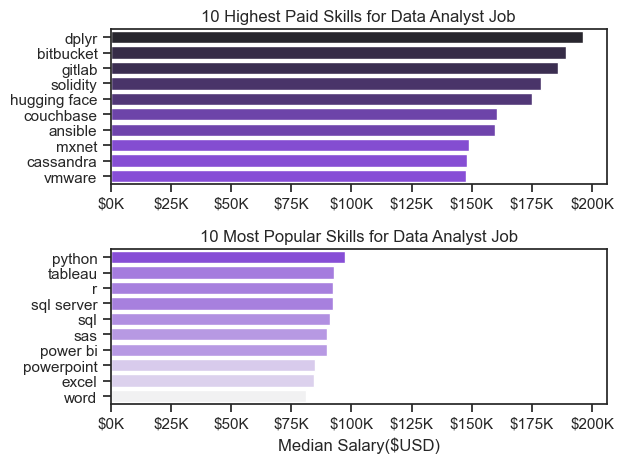

In [44]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='whitegrid')
sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:#8338ec_r', legend=False)
# df_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('10 Highest Paid Skills for Data Analyst Job')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data=df_top_count, x='median', y=df_top_count.index, ax=ax[1], hue='median', palette='light:#8338ec', legend=False)
# df_top_count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('10 Most Popular Skills for Data Analyst Job')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

In [48]:
df_DA_USA = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()


Text(0.5, 12.44444444444443, 'Salaries')

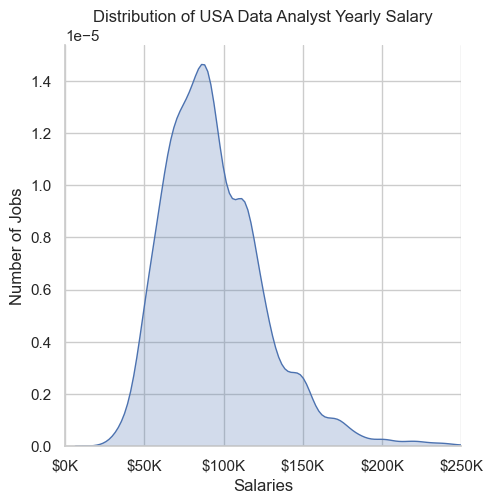

In [52]:
# df_DA_USA['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')

sns.displot(data=df_DA_USA['salary_year_avg'], kind="kde", fill=True)
plt.xlim(0, 250000)
plt.title('Distribution of USA Data Analyst Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlabel('Salaries')